<a href="https://colab.research.google.com/github/EmilianoCastelan/Investigacion-de-Operaciones-/blob/main/Ejemplo_PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

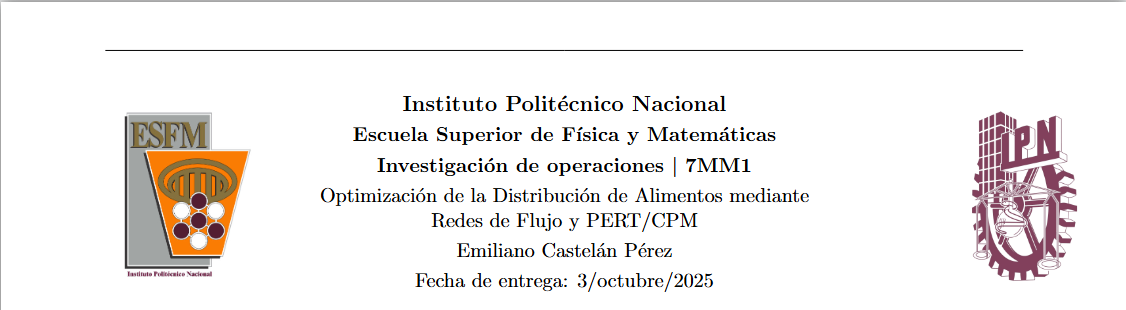

En México, la distribución eficiente de alimentos desde bancos de alimentos hasta comedores comunitarios es un desafío logístico clave para combatir el hambre y reducir el desperdicio. Según datos de la FAO, alrededor del 34% de los alimentos producidos en el país se pierden o desperdician, mientras que millones de personas enfrentan inseguridad alimentaria. Una de las causas principales de esta ineficiencia es la falta de planificación y optimización en las rutas de distribución, lo que genera retrasos, costos elevados y, en última instancia, alimentos que no llegan a tiempo a quienes más los necesitan.

**Objetivo**:
Minimizar el tiempo y los costos asociados a la distribución de alimentos, garantizando que los recursos lleguen de manera oportuna y eficiente a los comedores comunitarios.

### **Metodología:**

En este modelo de red de flujo para optimizar la distribución de alimentos, cada **nodo** representa una etapa crítica del proceso logístico, las cuales son:

| **Nodo** | **Descripción**                                                                                     | **Ejemplo Práctico**                                                                                     |
|----------|-----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **A**    | **Recolectar alimentos en bancos de alimentos**: Punto de inicio donde se obtienen los alimentos donados (perecederos y no perecederos). | Banco de Alimentos de la CDMX o donaciones de supermercados.                                           |
| **B**    | **Clasificar y revisar alimentos**: Los alimentos se inspeccionan para garantizar su calidad y se clasifican por tipo (ej: frutas, granos, lácteos). | Separar alimentos por caducidad y estado (bueno/malo).                                                 |
| **C**    | **Empacar alimentos según tipo**: Los alimentos se empacan en contenedores adecuados para su transporte y conservación. | Empacar frutas en cajas ventiladas y granos en bolsas selladas.                                        |
| **D**    | **Coordinar rutas de transporte**: Planificación de las rutas óptimas para distribuir los alimentos a los comedores. | Usar algoritmos de ruta más corta (ej: Dijkstra) para minimizar tiempo y costo.                         |
| **E**    | **Cargar camiones con alimentos empacados**: Los alimentos empacados se cargan en vehículos de transporte. | Camiones refrigerados para productos perecederos.                                                      |
| **F**    | **Transportar alimentos a comedores**: Traslado físico de los alimentos desde el banco hasta los comedores comunitarios. | Ruta: Banco de Alimentos → Comedor "Los Ángeles" en Tlalpan.                                           |
| **G**    | **Descargar y verificar alimentos en comedores**: Los alimentos se descargan y se verifica su estado al llegar. | Revisar que no haya daños durante el transporte.                                                       |
| **H**    | **Distribuir alimentos a beneficiarios**: Entrega final de los alimentos a las personas en los comedores. | Reparto organizado por familias o grupos vulnerables.                                                 |
| **I**    | **Reportar entregas y actualizar inventarios**: Registro de las entregas realizadas y actualización de existencias. | Sistema digital para llevar control de inventario en tiempo real.                                     |
| **J**    | **Recibir retroalimentación de comedores**: Recopilar comentarios de los comedores para mejorar futuras distribuciones. | Encuestas a responsables de comedores sobre calidad y puntualidad.                                     |

---

#### Relación entre Nodos :
- Los **arcos** entre nodos representan las **dependencias** entre actividades. Por ejemplo:
  - **A → B**: No se puede clasificar (**B**) sin antes recolectar (**A**).
  - **C → E**: Los alimentos deben estar empacados (**C**) antes de cargar los camiones (**E**).
- En este modelo, los **pesos en los arcos**  representan la **duración estimada** de cada actividad


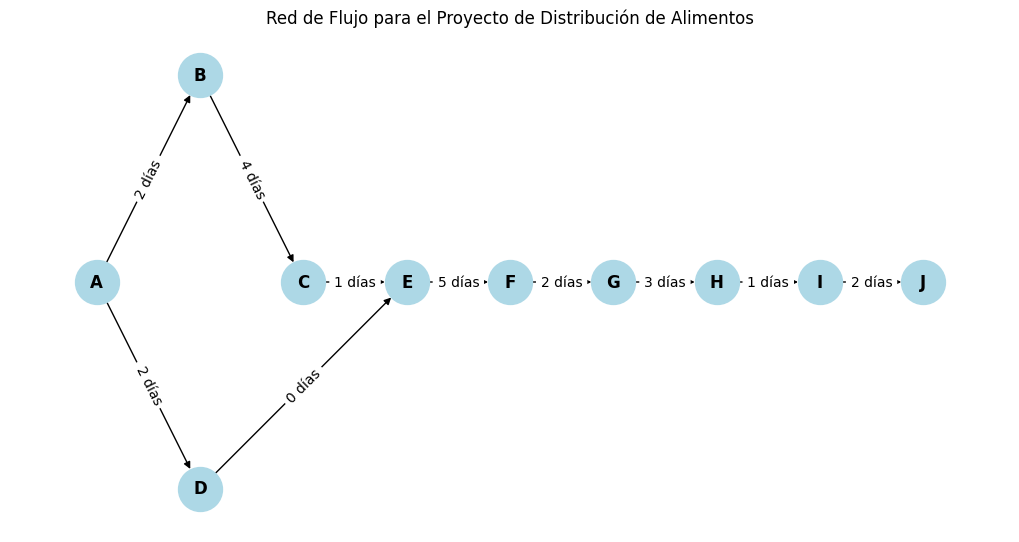

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido (DiGraph) para representar las dependencias
G = nx.DiGraph()

# Añadir nodos (actividades)
actividades = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
G.add_nodes_from(actividades)

# Añadir aristas (dependencias) con la duración como peso
G.add_edge("A", "B", weight=2)  # A → B, duración de B = 2 días
G.add_edge("B", "C", weight=4)  # B → C, duración de C = 4 días
G.add_edge("A", "D", weight=2)  # A → D, duración de D = 2 días
G.add_edge("C", "E", weight=1)  # C → E, duración de E = 1 día
G.add_edge("D", "E", weight=0)  # D → E, D no tiene duración adicional aquí, solo es predecesor
G.add_edge("E", "F", weight=5)  # E → F, duración de F = 5 días
G.add_edge("F", "G", weight=2)  # F → G, duración de G = 2 días
G.add_edge("G", "H", weight=3)  # G → H, duración de H = 3 días
G.add_edge("H", "I", weight=1)  # H → I, duración de I = 1 día
G.add_edge("I", "J", weight=2)  # I → J, duración de J = 2 días

# Posiciones de los nodos para visualización
pos = {
    "A": (0, 2),
    "B": (1, 3),
    "C": (2, 2),
    "D": (1, 1),
    "E": (3, 2),
    "F": (4, 2),
    "G": (5, 2),
    "H": (6, 2),
    "I": (7, 2),
    "J": (8, 2),
}

# Dibujar el grafo
plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']} días" for u, v, d in G.edges(data=True)})

# Añadir título y mostrar
plt.title("Red de Flujo para el Proyecto de Distribución de Alimentos")
plt.axis('off')
plt.show()


In [3]:
# Calcular la ruta crítica
ruta_critica = nx.dag_longest_path(G, weight="weight")
duracion_total = nx.dag_longest_path_length(G, weight="weight")

print(f"Ruta crítica: {ruta_critica}")
print(f"Duración total del proyecto: {duracion_total} días")


Ruta crítica: ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J']
Duración total del proyecto: 20 días


### **Análisis de Costos en PERT/CPM**

**¿Qué se busca hacer?**

Aquí se busca evaluar el **costo total del proyecto** y explorar cómo reducir la duración del proyecto con un **presupuesto limitado**, o minimizar costos sin exceder un plazo específico.
- **Asignar costos a cada actividad**
- **Identificar actividades críticas desde el punto de vista económico**
- **Analizar el trade-off entre tiempo y costo**:
  - ¿Cuánto cuesta acelerar una actividad (ej: contratar más camiones para reducir el tiempo de transporte)?
  - ¿Vale la pena reducir la duración del proyecto si el costo aumenta significativamente?


---


In [4]:
# Costos por actividad (en miles de pesos)
costos = {
    "A": 5,  # Recolectar alimentos
    "B": 3,  # Clasificar alimentos
    "C": 7,  # Empacar alimentos
    "D": 2,  # Coordinar rutas
    "E": 4,  # Cargar camiones
    "F": 10, # Transportar (alto costo por combustible)
    "G": 3,  # Descargar y verificar
    "H": 4,  # Distribuir a beneficiarios
    "I": 2,  # Reportar entregas
    "J": 1,  # Retroalimentación
}

# Costo total del proyecto (suma de costos en la ruta crítica)
ruta_critica = ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J']
costo_total = sum(costos[act] for act in ruta_critica)
print(f"Costo total del proyecto: ${costo_total} mil pesos")


Costo total del proyecto: $39 mil pesos


### **Enfoque Probabilístico en PERT**
Con esto se busca incorporar **incertidumbre** en las duraciones de las actividades, ya que en la realidad los tiempos no son fijos (por retrasos por clima, disponibilidad de alimentos, etc.).

Aquí lo que buscamos es:
- Estimar **tres duraciones** para cada actividad:
  - **Optimista (a):** Tiempo mínimo si todo sale bien.
  - **Más probable (m):** Tiempo estimado normal.
  - **Pesimista (b):** Tiempo máximo si hay problemas.
- Calcular la **duración esperada** y la **varianza** para cada actividad.(TE = (a + 4(m) + b)/6 )
- Determinar la **probabilidad de terminar el proyecto en un tiempo específico** (usando la distribución normal).

**Ejemplo dentro del proyecto:**
Para la actividad **A (Recolectar alimentos)**:
- **Optimista:** 2 días (donaciones llegan a tiempo).
- **Más probable:** 3 días.
- **Pesimista:** 5 días (retrasos en donaciones).
- **Duración esperada:** \( TE = (2 + 4(3) + 5)/6 = 3.17 \) días.


In [5]:
import numpy as np

# Duraciones PERT para actividad A (ejemplo)
a_A, m_A, b_A = 2, 3, 5
TE_A = (a_A + 4 * m_A + b_A) / 6
V_A = ((b_A - a_A) / 6) ** 2

# Desviación estándar del proyecto (suma de varianzas en ruta crítica)
varianza_proyecto = sum(V_A for act in ruta_critica)
desv_std_proyecto = np.sqrt(varianza_proyecto)

print(f"Duración esperada de A: {TE_A:.2f} días")
print(f"Desviación estándar del proyecto: {desv_std_proyecto:.2f} días")


Duración esperada de A: 3.17 días
Desviación estándar del proyecto: 1.50 días


### **Integración con Redes de Flujo**
Modelar el **flujo físico de alimentos** como un problema de **optimización de redes**, donde se busca minimizar costos o maximizar la eficiencia del transporte de las siguientes maneras:

- Representar el proyecto como una **red de flujo**:
  - **Nodos:** Puntos de origen (bancos de alimentos), destino (comedores), y almacenes intermedios.
  - **Arcos:** Rutas de transporte con **capacidades** y **costos** ($/km).
- Resolver el problema de **flujo de costo mínimo** para:
  - Minimizar el costo total de transporte.
  - Garantizar que todos los comedores reciban los alimentos necesarios.

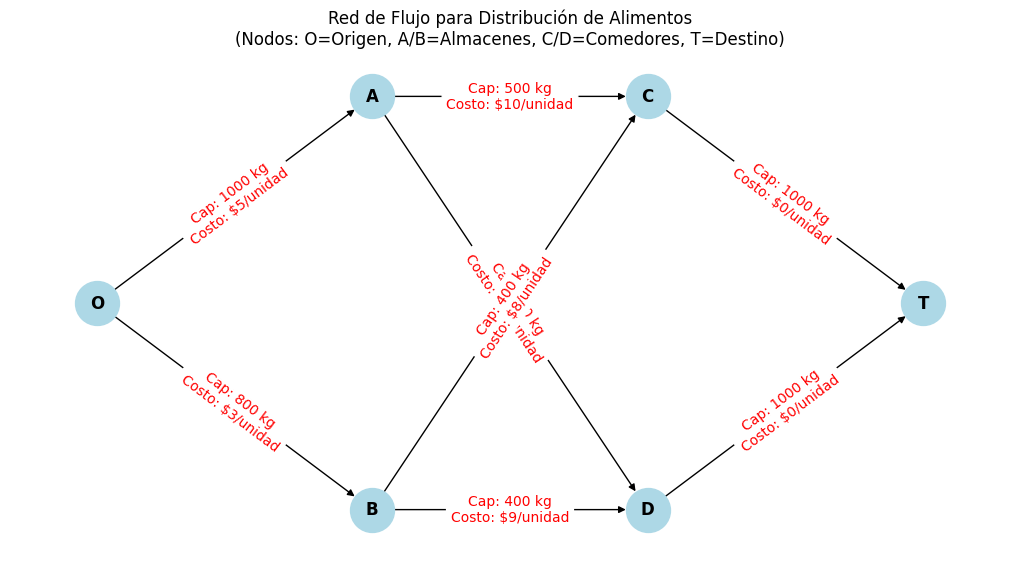

Flujo de costo mínimo: {'O': {'A': 1000, 'B': 800}, 'A': {'C': 500, 'D': 500}, 'B': {'C': 400, 'D': 400}, 'C': {'T': 900}, 'D': {'T': 900}, 'T': {}}


In [11]:
import networkx as nx

# Crear grafo para flujo de costo mínimo
G_flujo = nx.DiGraph()

#O=Origen, A=Banco1, B=Banco2, C=Comedor1, D=Comedor2, T=Destino
G_flujo.add_nodes_from(["O", "A", "B", "C", "D", "T"])

# Aristas con capacidad y costo
G_flujo.add_edge("O", "A", capacity=1000, weight=5)  # Capacidad: 1000 kg, costo: $5 por unidad
G_flujo.add_edge("O", "B", capacity=800, weight=3)
G_flujo.add_edge("A", "C", capacity=500, weight=10)
G_flujo.add_edge("A", "D", capacity=500, weight=12)
G_flujo.add_edge("B", "C", capacity=400, weight=8)
G_flujo.add_edge("B", "D", capacity=400, weight=9)
G_flujo.add_edge("C", "T", capacity=1000, weight=0)
G_flujo.add_edge("D", "T", capacity=1000, weight=0)

pos_flujo = {
    "O": (0, 2),
    "A": (2, 3),
    "B": (2, 1),
    "C": (4, 3),
    "D": (4, 1),
    "T": (6, 2),
}

# Dibujar el grafo de flujo
plt.figure(figsize=(10, 5))
nx.draw(G_flujo, pos_flujo, with_labels=True, node_color='lightblue', node_size=1000, font_weight='bold', arrows=True)

edge_labels = {(u, v): f"Cap: {d['capacity']} kg\nCosto: ${d['weight']}/unidad" for u, v, d in G_flujo.edges(data=True)}
nx.draw_networkx_edge_labels(G_flujo, pos_flujo, edge_labels=edge_labels, font_color='red')

plt.title("Red de Flujo para Distribución de Alimentos\n(Nodos: O=Origen, A/B=Almacenes, C/D=Comedores, T=Destino)")
plt.axis('off')
plt.show()



# Calcular flujo de costo mínimo
flujo_costo_min = nx.max_flow_min_cost(G_flujo, "O", "T")
print(f"Flujo de costo mínimo: {flujo_costo_min}")
